# EDA MinerAI

---


O objetivo é realizar uma EDA (Análise de Dados Exploratória) para compreender o comportamento dos dados e tentar descobrir um
padrão que explique e diferencie clientes bons de maus pagadores.

Pontos principais da exploração:
* Entender a distribuição das características e a relação com a classificação de cada cliente.
* Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta?
* Gráfico de distribuição de bons e maus pagadores por estado.
* Boxplot para explicar como o tipo de residência interfere na classificação do pagador
* Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta?
* A idade interfere na classificação do pagador?

### **Fonte dos dados:** [MinerAI.csv](https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv)

### **Integrantes:** Ellen Newerkla (*EDA e Amostragem*), Igor Seabra (*Documentação e Estrutura do Projeto*), Vitor Marvulle (*Machine Learning*)




---



# 0. Importações e Instalações necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparando o **DataFrame**

Essa primeira etapa carregamos o dataframe, adicionamos colunas explicativas ao dataframe (dadas pelo orientador) e entendemos seus tipos e estrutura

1)
* Primeiro começamos puxando o csv da url passada pelo professor
* Indicamos que o separador de colunas é por **tabulação** (quando rodamos pela primeira vez aparece as colunas e o '\t' bem evidente)
* 'econding' para lidar com caracteres especiais
* 'header' para indicar que o df não possuia nomes de colunas e não deverá pegar a primeira linha como rotulo.
* df.shape para sabermos o tamanho do Dataframe (50000 linhas x 54 colunas)

In [2]:
url = "https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv"
df = pd.read_csv(url, sep= '\t', encoding="latin1", header=None)
print(df.shape)
df.head()


(50000, 54)


/tmp/ipython-input-1320358432.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep= '\t', encoding="latin1", header=None)


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


### **Aviso Importante! ⚠️**
Caso o link de erro de 404 ao puxar os dados, rode ele manualmente com o arquivo 'credit.csv'

In [3]:
# df = pd.read_csv('credit.csv', sep='\t', encoding="latin1", header=None)
# print(df.shape)
# df.head()

2) Criamos colunas seguindo a sequência do dicionário de dados

In [4]:
colunas = [
    "ID_CLIENTE",
    "TIPO_FUNCIONARIO",
    "DIA_PAGAMENTO",
    "TIPO_ENVIO_APLICACAO",
    "QUANT_CARTOES_ADICIONAIS",
    "TIPO_ENDERECO_POSTAL",
    "SEXO",
    "ESTADO_CIVIL",
    "QUANT_DEPENDENTES",
    "NIVEL_EDUCACIONAL",
    "ESTADO_NASCIMENTO",
    "CIDADE_NASCIMENTO",
    "NACIONALIDADE",
    "ESTADO_RESIDENCIAL",
    "CIDADE_RESIDENCIAL",
    "BAIRRO_RESIDENCIAL",
    "FLAG_TELEFONE_RESIDENCIAL",
    "CODIGO_AREA_TELEFONE_RESIDENCIAL",
    "TIPO_RESIDENCIA",
    "MESES_RESIDENCIA",
    "FLAG_TELEFONE_MOVEL",
    "FLAG_EMAIL",
    "RENDA_PESSOAL_MENSAL",
    "OUTRAS_RENDAS",
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES",
    "QUANT_CONTAS_BANCARIAS",
    "QUANT_CONTAS_BANCARIAS_ESPECIAIS",
    "VALOR_PATRIMONIO_PESSOAL",
    "QUANT_CARROS",
    "EMPRESA",
    "ESTADO_PROFISSIONAL",
    "CIDADE_PROFISSIONAL",
    "BAIRRO_PROFISSIONAL",
    "FLAG_TELEFONE_PROFISSIONAL",
    "CODIGO_AREA_TELEFONE_PROFISSIONAL",
    "MESES_NO_TRABALHO",
    "CODIGO_PROFISSAO",
    "TIPO_OCUPACAO",
    "CODIGO_PROFISSAO_CONJUGE",
    "NIVEL_EDUCACIONAL_CONJUGE",
    "FLAG_DOCUMENTO_RESIDENCIAL",
    "FLAG_RG",
    "FLAG_CPF",
    "FLAG_COMPROVANTE_RENDA",
    "PRODUTO",
    "FLAG_REGISTRO_ACSP",
    "IDADE",
    "CEP_RESIDENCIAL_3",
    "CEP_PROFISSIONAL_3",
    "ROTULO_ALVO_MAU"
]
df.columns = colunas
df.head()


,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [5]:
df['NIVEL_EDUCACIONAL'].value_counts()

,count
NIVEL_EDUCACIONAL,
0,50000


# 2. **Padronização** de dados

Segunda e **principal** parte, iremos padronizar textos, agrupar colunas em listas (categóricas, numéricas e binárias) e tratar de dados nulos ou faltantes

2.1. Primeiro usamos .info() e .isnull() para uma primeira avaliação

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

In [7]:
df.isnull().sum()

,0
ID_CLIENTE,0
TIPO_FUNCIONARIO,0
DIA_PAGAMENTO,0
TIPO_ENVIO_APLICACAO,0
QUANT_CARTOES_ADICIONAIS,0
TIPO_ENDERECO_POSTAL,0
SEXO,0
ESTADO_CIVIL,0
QUANT_DEPENDENTES,0
NIVEL_EDUCACIONAL,0


2.2. Aqui criamos listas separando os dados em "categóricos", "numéricos" e "binários", para que assim não ocorra nenhum erro na hora de padronizar as textos.

Essa parte poderia sim ser automatizada com:

 `categoricas = [col for col in df.columns if df[col].dtype == 'object']`

 Mas por algum motivo apenas 47 colunas eram resgatadas, então optei por deixar manual, já que não estamos trabalhando com um dataset com grandes quantidades de colunas

In [8]:
categoricas = [
    'TIPO_FUNCIONARIO', 'TIPO_ENVIO_APLICACAO', 'SEXO', 'ESTADO_CIVIL',
    'NIVEL_EDUCACIONAL', 'ESTADO_NASCIMENTO', 'CIDADE_NASCIMENTO',
    'NACIONALIDADE', 'ESTADO_RESIDENCIAL', 'CIDADE_RESIDENCIAL',
    'BAIRRO_RESIDENCIAL', 'EMPRESA', 'ESTADO_PROFISSIONAL',
    'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'TIPO_RESIDENCIA',
    'CODIGO_PROFISSAO', 'TIPO_OCUPACAO', 'CODIGO_PROFISSAO_CONJUGE',
    'NIVEL_EDUCACIONAL_CONJUGE', 'PRODUTO', 'FLAG_OUTROS_CARTOES',
    'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL',
    'CEP_RESIDENCIAL_3', 'CEP_PROFISSIONAL_3', 'FLAG_TELEFONE_RESIDENCIAL',
    'FLAG_TELEFONE_MOVEL', 'FLAG_TELEFONE_PROFISSIONAL', 'FLAG_REGISTRO_ACSP'
]

numericas = [
    'ID_CLIENTE', 'DIA_PAGAMENTO', 'QUANT_CARTOES_ADICIONAIS',
    'QUANT_DEPENDENTES', 'MESES_RESIDENCIA', 'RENDA_PESSOAL_MENSAL',
    'OUTRAS_RENDAS', 'QUANT_CONTAS_BANCARIAS',
    'QUANT_CONTAS_BANCARIAS_ESPECIAIS', 'VALOR_PATRIMONIO_PESSOAL',
    'MESES_NO_TRABALHO', 'QUANT_CARROS', 'IDADE'
]

binarias = [
    'TIPO_ENDERECO_POSTAL', 'FLAG_EMAIL', 'FLAG_VISA',
    'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
    'FLAG_DOCUMENTO_RESIDENCIAL', 'FLAG_RG', 'FLAG_CPF',
    'FLAG_COMPROVANTE_RENDA', 'ROTULO_ALVO_MAU'
]

numericas = [col for col in numericas if col not in binarias]

print(f'Categoricas ({len(categoricas)}): {categoricas}')
print(f'Numericas ({len(numericas)}): {numericas}')
print(f'Binarias ({len(binarias)}): {binarias}')

print("\n", df['NIVEL_EDUCACIONAL'].unique())

Categoricas (30): ['TIPO_FUNCIONARIO', 'TIPO_ENVIO_APLICACAO', 'SEXO', 'ESTADO_CIVIL', 'NIVEL_EDUCACIONAL', 'ESTADO_NASCIMENTO', 'CIDADE_NASCIMENTO', 'NACIONALIDADE', 'ESTADO_RESIDENCIAL', 'CIDADE_RESIDENCIAL', 'BAIRRO_RESIDENCIAL', 'EMPRESA', 'ESTADO_PROFISSIONAL', 'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'TIPO_RESIDENCIA', 'CODIGO_PROFISSAO', 'TIPO_OCUPACAO', 'CODIGO_PROFISSAO_CONJUGE', 'NIVEL_EDUCACIONAL_CONJUGE', 'PRODUTO', 'FLAG_OUTROS_CARTOES', 'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL', 'CEP_RESIDENCIAL_3', 'CEP_PROFISSIONAL_3', 'FLAG_TELEFONE_RESIDENCIAL', 'FLAG_TELEFONE_MOVEL', 'FLAG_TELEFONE_PROFISSIONAL', 'FLAG_REGISTRO_ACSP']
Numericas (13): ['ID_CLIENTE', 'DIA_PAGAMENTO', 'QUANT_CARTOES_ADICIONAIS', 'QUANT_DEPENDENTES', 'MESES_RESIDENCIA', 'RENDA_PESSOAL_MENSAL', 'OUTRAS_RENDAS', 'QUANT_CONTAS_BANCARIAS', 'QUANT_CONTAS_BANCARIAS_ESPECIAIS', 'VALOR_PATRIMONIO_PESSOAL', 'MESES_NO_TRABALHO', 'QUANT_CARROS', 'IDADE']
Binarias (11): ['TIPO_ENDE

2.3. Padronizamos os texto categóricos

In [9]:
for col in categoricas:
  df[col] = (df[col]
             .astype(str)
             .str.strip()
             .str.lower()
             .str.replace(' ', '_')
             .str.replace('-', '_')
             .replace({'nan': np.nan})
             )

2.4. **Tratamento de Nulos**

Temos grandes quantidades de nulos em algumas colunas, mas a maior parte delas não serão relevantes para o proposito inicial da análise.

Porém a coluna `TIPO_RESIDENCIA` é muito importante e tem uma grande quantidade faltante (1.349) por isso, decidimos preencher esses dados com "Desconhecido", pois será manter os registros e evitará distorções.

Enquanto as outras colunas, faremos o mesmo processo, mesmo sendo pouco importantes agora.

In [10]:
df.fillna({
    'TIPO_RESIDENCIA': 'Desconhecido',
    'CIDADE_PROFISSIONAL': 'Desconhecido',
    'BAIRRO_PROFISSIONAL': 'Desconhecido',
    'CODIGO_PROFISSAO': 'Desconhecido',
    'TIPO_OCUPACAO': 'Desconhecido',
    'CODIGO_PROFISSAO_CONJUGE': 'Desconhecido',
    'NIVEL_EDUCACIONAL_CONJUGE': 'Desconhecido',
    'MESES_RESIDENCIA': df['MESES_RESIDENCIA'].median()
}, inplace=True)

df.isnull().sum()



,0
ID_CLIENTE,0
TIPO_FUNCIONARIO,0
DIA_PAGAMENTO,0
TIPO_ENVIO_APLICACAO,0
QUANT_CARTOES_ADICIONAIS,0
TIPO_ENDERECO_POSTAL,0
SEXO,0
ESTADO_CIVIL,0
QUANT_DEPENDENTES,0
NIVEL_EDUCACIONAL,0


2.5. Padronizamos as variaveis de gênero

In [11]:
mapeamento_sexo = {
    'f': 'Feminino',
    'm': 'Masculino',
    'n': 'Não Informado',
    '1': 'Não Informado'
}

df['SEXO_PADRONIZADO'] = df['SEXO'].astype(str).str.lower().map(mapeamento_sexo).fillna('Outro')

2.6. Analisando a categoria estado civil, percebemos que não há descrição para o que os números significam, no dicionario de dados passado, está como "Codificação não informada", uma hipotese que levantamos é inferir significado aos códigos.

Por ser uma suposição, pode ser que a análise não esteja 100% correta, mas mesmo assim, podemos tirar insites interressantes, então suponhamos que representem estados civis padrões, como:

0.   União Estável
1.   Solteiro(a)
2.   Casado(a)
3.   Divorciado(a)
4.   Viúvo(a)
5.   Seprado Judicialmente
6.   Outro
7.   Não Informado

In [12]:
mapeamento_estado_civil = {
    '0': 'União Estável',
    '1': 'Solteiro(a)',
    '2': 'Casado(a)',
    '3': 'Divorciado(a)',
    '4': 'Viúvo(a)',
    '5': 'Separado Judicialmente',
    '6': 'Outro',
    '7': 'Não informado',
}

df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].astype(str).str.lower().map(mapeamento_estado_civil)

# 3. Analisar Distribuição da Variável Alvo

Quarta parte se basea em **explorar** a distribuição da variável 'ROTULO_ALVO_MAU' para entender a proporção de bons e maus pagadores no dataset.

3.1. Distribuição de bons e maus pagadores

Antes de começarmos, precisamos entender que essa distribuição, a variavél `'ROTULO_ALVO_MAU'`, é de tipo binario, tendo apenas "Mau pagador" como 1, e "Bom pagador" como 0.

In [13]:
print('1. Contagem de bons e maus pagadores:')
contagem_alvo = df['ROTULO_ALVO_MAU'].value_counts()
print(contagem_alvo)

print('\n2. Porcentagem de bons e maus pagadores:')
porcentagem_alvo = df['ROTULO_ALVO_MAU'].value_counts(normalize=True) * 100
print(porcentagem_alvo)

1. Contagem de bons e maus pagadores:
ROTULO_ALVO_MAU
0    36959
1    13041
Name: count, dtype: int64

2. Porcentagem de bons e maus pagadores:
ROTULO_ALVO_MAU
0    73.918
1    26.082
Name: proportion, dtype: float64


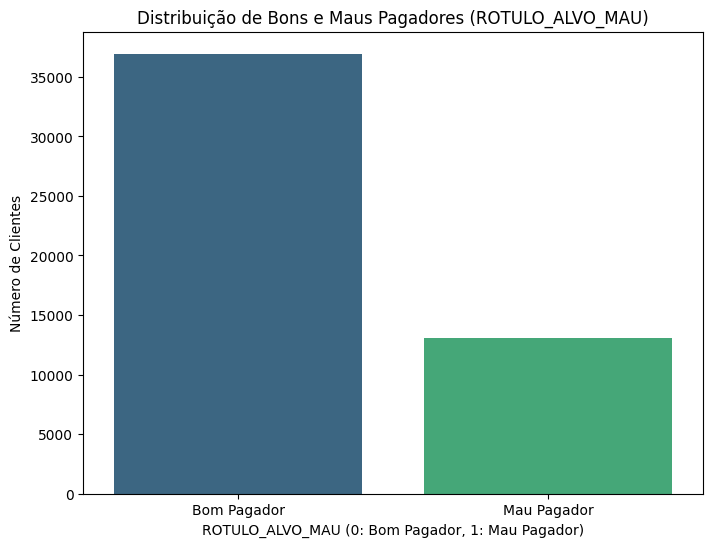

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_alvo.index, y=contagem_alvo.values, palette='viridis', hue=contagem_alvo.index, legend=False)
plt.title('Distribuição de Bons e Maus Pagadores (ROTULO_ALVO_MAU)')
plt.xlabel('ROTULO_ALVO_MAU (0: Bom Pagador, 1: Mau Pagador)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Bom Pagador', 'Mau Pagador'])
plt.show()

# 4. Analisar Características Categóricas vs. Alvo

Agora iremos analisar a relação entre:

1. '**SEXO**'
2. '**ESTADO_CIVIL**'
3. '**QUANT_DEPENDENTES**'
4. '**NIVEL_EDUCACIONAL**'

com a variável alvo '**ROTULO_ALVO_MAU**', mostrando a proporção de maus pagadores em cada categoria.

### 4.1. Sexo x Rotulo Alvo Mau

Sendo um gráfico de proporção, ele mostra a distribuição da variavel alvo em relação a categoria especifica.

A categoria **‘Outro’** apresenta a maior proporção de maus pagadores, mas como o número de observações é extremamente baixo `(n=17)`, essa taxa é estatisticamente instável e não deve ser interpretada como um insight confiável.

Mas análisando apenas entre os sexos **feminino** e **masculino**, a taxa de maus pagadores é discretamente maior no grupo Masculino. A diferença não é muito grande, mas é consistente o suficiente para ser observada `(f= 25%, m= 27%)`.

Essas diferenças sugerem que o sexo pode influenciar o comportamento de crédito, mas o impacto é moderado. A variável pode ser útil no modelo, mas provavelmente não será uma das mais determinantes.

Analisando SEXO vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
SEXO_PADRONIZADO,,,
Feminino,23015,7790,0.252881
Masculino,13902,5228,0.273288
Não Informado,32,16,0.333333
Outro,10,7,0.411765


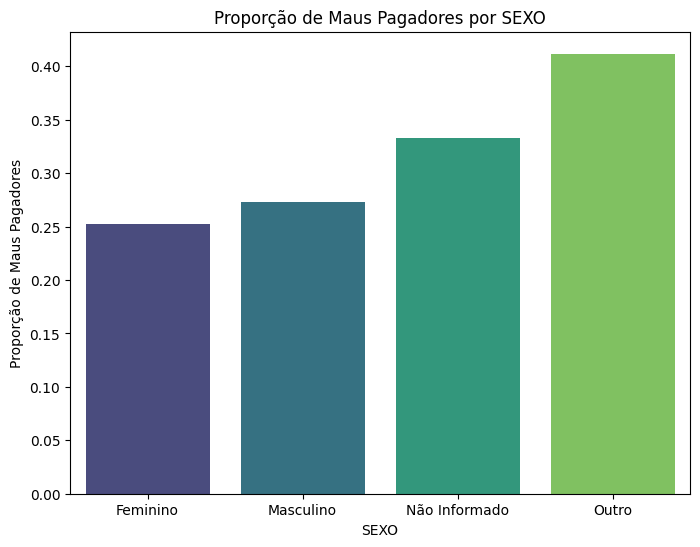

In [15]:
print('Analisando SEXO vs. ROTULO_ALVO_MAU:')
analyse_sexo = df.groupby(['SEXO_PADRONIZADO', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_sexo['PROPORCAO_MAU_PAGADOR'] = analyse_sexo[1] / (analyse_sexo[0] + analyse_sexo[1])
display(analyse_sexo)

plt.figure(figsize=(8, 6))
sns.barplot(x=analyse_sexo.index, y=analyse_sexo['PROPORCAO_MAU_PAGADOR'], palette='viridis', hue=analyse_sexo.index, legend=False)
plt.title('Proporção de Maus Pagadores por SEXO')
plt.xlabel('SEXO')
plt.ylabel('Proporção de Maus Pagadores')
plt.show()

### 4.2. Estado Civil x Rotulo Alvo Mau

O estado civil apresenta diferenças relevantes no risco de inadimplência.

O grupo **Solteiro(a)** concentra a maior proporção de **maus pagadores** entre as categorias com volume significativo.

Já **Casado(a), Divorciado(a) e Viúvo(a)** apresentam as menores taxas, sugerindo maior estabilidade financeira ou comportamental.

Categorias com poucos registros, como União Estável e Outro, devem ser interpretadas com cautela, pois suas proporções são estatisticamente menos confiáveis.


Analisando ESTADO_CIVIL vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
ESTADO_CIVIL,,,
Casado(a),19690,6277,0.241730
Divorciado(a),493,139,0.219937
Não informado,392,142,0.265918
Outro,1330,547,0.291422
Separado Judicialmente,967,329,0.253858
Solteiro(a),10631,4655,0.304527
União Estável,147,55,0.272277
Viúvo(a),3309,897,0.213267


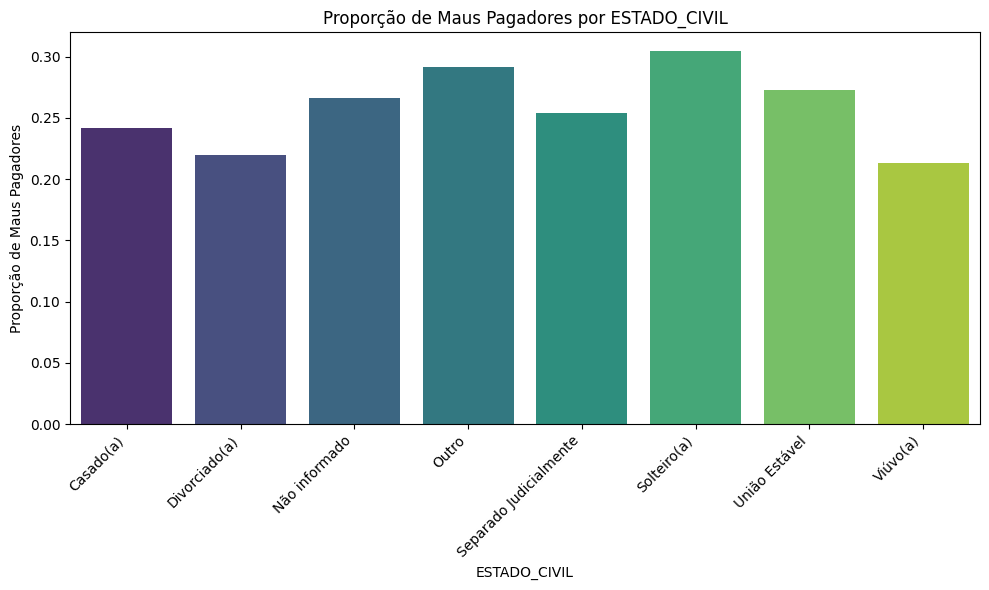

In [16]:
print('\nAnalisando ESTADO_CIVIL vs. ROTULO_ALVO_MAU:')
analyse_estado_civil = df.groupby(['ESTADO_CIVIL', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_estado_civil['PROPORCAO_MAU_PAGADOR'] = analyse_estado_civil[1] / (analyse_estado_civil[0] + analyse_estado_civil[1])
display(analyse_estado_civil)

plt.figure(figsize=(10, 6))
sns.barplot(x=analyse_estado_civil.index, y=analyse_estado_civil['PROPORCAO_MAU_PAGADOR'], palette='viridis', hue=analyse_estado_civil.index, legend=False)
plt.title('Proporção de Maus Pagadores por ESTADO_CIVIL')
plt.xlabel('ESTADO_CIVIL')
plt.ylabel('Proporção de Maus Pagadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.3. Quantidades de Dependentes x Rotulo Alvo Mal

A variável quantidade de dependentes, apresenta um comportamento relativamente estável para os grupos mais populosos (0, 1 e 2 dependentes), **com proporções de inadimplência muito próximas**.

A partir de 3 dependentes observa-se um aumento gradual e consistente na taxa de maus pagadores, sugerindo que o **crescimento da carga financeira** pode **impactar o risco de crédito**.

Entretanto, para valores altos de dependentes (acima de 7), os volumes são extremamente baixos, tornando as proporções estatisticamente instáveis e inadequadas para conclusões.

No geral, há uma tendência moderada de aumento do risco conforme cresce o número de dependentes, mas o efeito é mais claro apenas nos grupos intermediários.

Analisando QUANT_DEPENDENTES vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
QUANT_DEPENDENTES,,,
0,24914,8741,0.259724
1,5236,1768,0.252427
2,3959,1404,0.261794
3,1786,679,0.275456
4,602,258,0.300000
5,261,104,0.284932
6,97,42,0.302158
7,47,18,0.276923
8,25,10,0.285714


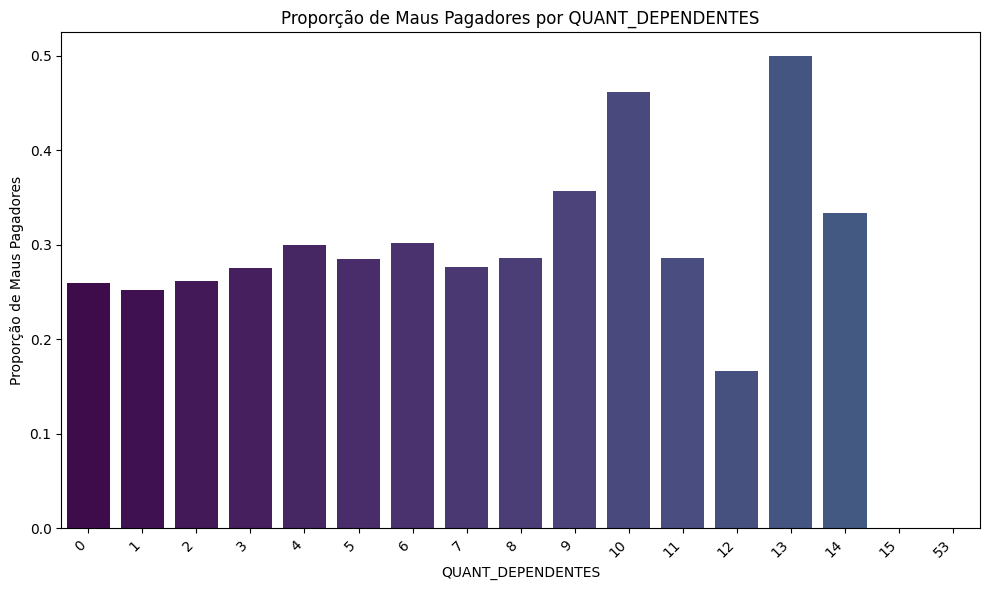

In [17]:
print('Analisando QUANT_DEPENDENTES vs. ROTULO_ALVO_MAU:')
analyse_quant_dependentes = df.groupby(['QUANT_DEPENDENTES', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_quant_dependentes['PROPORCAO_MAU_PAGADOR'] = analyse_quant_dependentes[1] / (analyse_quant_dependentes[0] + analyse_quant_dependentes[1])
display(analyse_quant_dependentes)

plt.figure(figsize=(10, 6))
sns.barplot(x=analyse_quant_dependentes.index, y=analyse_quant_dependentes['PROPORCAO_MAU_PAGADOR'], palette='viridis', hue=analyse_quant_dependentes.index, legend=False)
plt.title('Proporção de Maus Pagadores por QUANT_DEPENDENTES')
plt.xlabel('QUANT_DEPENDENTES')
plt.ylabel('Proporção de Maus Pagadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.4. Nível Educacional x Rotulo Alvo Mau ⚠️

Ao análisar a variável "Nível Educacional", verificamos que o dataset **não possui valores** distintos na coluna. Todos os registros aparecem como "0", indicando a ausência total de informações sobre o nível educacional dos clientes.

Como consequência, **não é possível realizar qualquer análise** estatística ou comparativa entre nível educacional e inadimplência, já que a variável não possui variabilidade nem registros válidos. Essa limitação parece estar presente no arquivo original que foi passado, pois essa ausência ocorre antes de qualquer etapa de limpeza ou transformação.

Porém, no dataset percebemos a existencia da coluna **`nivel educacional do conjuge`**, o que pode influencial de forma indireta a renda familiar, e que, apesar de não ser a variavél correta, substitui bem a que queriamos análisar.

**4.4.1. Nivel Educacional**

In [18]:
df['NIVEL_EDUCACIONAL'].value_counts(dropna=False)

,count
NIVEL_EDUCACIONAL,
0,50000


Analisando Nível Educacional vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
NIVEL_EDUCACIONAL,,,
0,36959,13041,0.26082


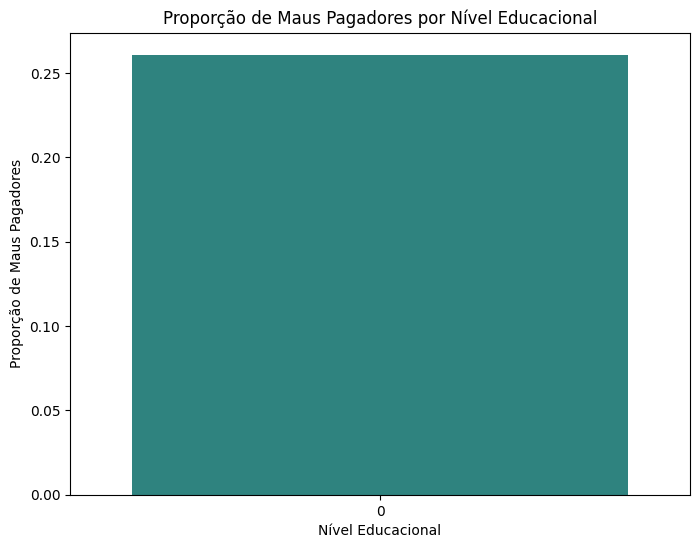

In [19]:
print('Analisando Nível Educacional vs. ROTULO_ALVO_MAU:')
analyse_edu = df.groupby(['NIVEL_EDUCACIONAL', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_edu['PROPORCAO_MAU_PAGADOR'] = analyse_edu[1] / (analyse_edu[0] + analyse_edu[1])
display(analyse_edu)

plt.figure(figsize=(8, 6))
sns.barplot(x=analyse_edu.index, y=analyse_edu['PROPORCAO_MAU_PAGADOR'], palette='viridis', hue=analyse_edu.index, legend=False)
plt.title('Proporção de Maus Pagadores por Nível Educacional')
plt.xlabel('Nível Educacional')
plt.ylabel('Proporção de Maus Pagadores')
plt.show()

**4.4.2. Nivel Educacional do Conjuge**

In [20]:
df['NIVEL_EDUCACIONAL_CONJUGE'].value_counts(dropna=False)

,count
NIVEL_EDUCACIONAL_CONJUGE,
Desconhecido,32338
0.0,15995
3.0,621
4.0,615
2.0,342
1.0,56
5.0,33


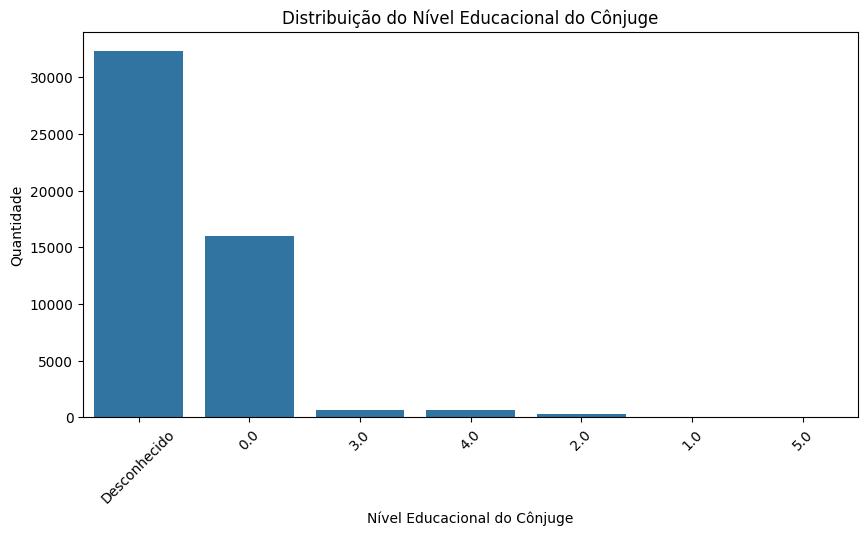

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="NIVEL_EDUCACIONAL_CONJUGE",
    order=df["NIVEL_EDUCACIONAL_CONJUGE"].value_counts().index
)
plt.title("Distribuição do Nível Educacional do Cônjuge")
plt.xlabel("Nível Educacional do Cônjuge")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


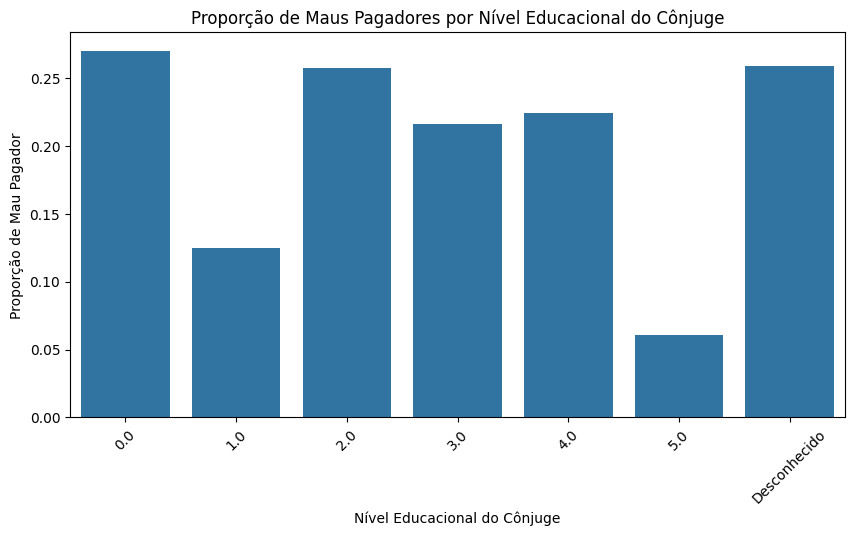

,NIVEL_EDUCACIONAL_CONJUGE,ROTULO_ALVO_MAU
0,0.0,0.269897
1,1.0,0.125000
2,2.0,0.257310
3,3.0,0.215781
4,4.0,0.224390
5,5.0,0.060606
6,Desconhecido,0.258365


In [22]:
proporcao = df.groupby("NIVEL_EDUCACIONAL_CONJUGE")["ROTULO_ALVO_MAU"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=proporcao,
    x="NIVEL_EDUCACIONAL_CONJUGE",
    y="ROTULO_ALVO_MAU"
)
plt.title("Proporção de Maus Pagadores por Nível Educacional do Cônjuge")
plt.xlabel("Nível Educacional do Cônjuge")
plt.ylabel("Proporção de Mau Pagador")
plt.xticks(rotation=45)
plt.show()

proporcao


**CONCLUSÃO**

Apesar de a variável apresentar muitos valores ‘Desconhecido’, a taxa de inadimplência dessa categoria é semelhante à média geral, o que indica que a ausência da informação não gera viés relevante.

Entre os níveis educacionais numéricos, o nível 0 apresenta a maior proporção de maus pagadores (26,9%), sugerindo que **níveis educacionais mais baixos podem estar associados a maior risco.**

Entretanto, categorias como 1 e 5 possuem poucos registros; portanto, suas **proporções muito baixas não devem ser interpretadas como melhores clientes, mas sim como resultado de baixa representatividade.**

Em resumo, essa variável possui limitações significativas, mas ainda mostra um leve padrão: níveis educacionais mais altos tendem a não aumentar o risco.

# 5. Distribuição variavel Alvo por Estado

Gráfico para mostrar a distribuição de bons e maus pagadores por 'ESTADO_RESIDENCIAL'.


A inadimplência varia de forma **moderada** entre os estados. A maior parte apresenta proporções entre `24% e 30%`, indicando que a localização geográfica exerce alguma influência, mas **não é um fator decisivo** isoladamente.

Estados como SC, RO e RS apresentam as menores taxas de inadimplência `(entre 18% e 22%)`, enquanto SE, DF, AL e AM apresentam os índices mais elevados `(acima de 30%)`. Entretanto, alguns estados possuem poucos registros, como RR, AC, TO, tornando suas proporções estatisticamente menos confiáveis.

No geral, embora existam diferenças regionais perceptíveis, a variável ESTADO_RESIDENCIAL apresenta impacto moderado sobre o risco de inadimplência e deve ser analisada em conjunto com outras características.

In [23]:
print('Analisando ESTADO_RESIDENCIAL vs. ROTULO_ALVO_MAU:')
analyse_estado_residencial = df.groupby(['ESTADO_RESIDENCIAL', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_estado_residencial['PROPORCAO_MAU_PAGADOR'] = analyse_estado_residencial[1] / (analyse_estado_residencial[0] + analyse_estado_residencial[1])
display(analyse_estado_residencial)

Analisando ESTADO_RESIDENCIAL vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
ESTADO_RESIDENCIAL,,,
ac,161,66,0.290749
al,1020,447,0.304703
am,280,122,0.303483
ap,376,117,0.237323
ba,3608,1383,0.277099
ce,3378,1241,0.268673
df,484,216,0.308571
es,495,193,0.280523
go,1235,459,0.270956


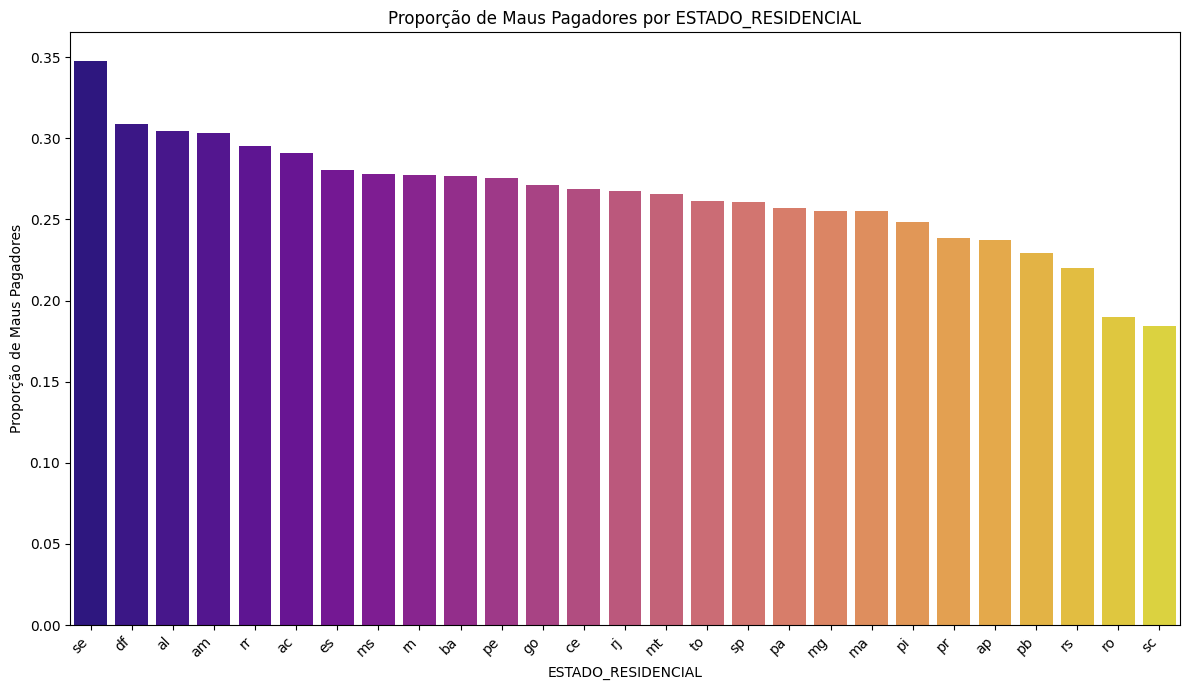

In [24]:
sorted_order = analyse_estado_residencial.sort_values(by='PROPORCAO_MAU_PAGADOR', ascending=False).index
plt.figure(figsize=(12, 7))
sns.barplot(x=analyse_estado_residencial.index, y=analyse_estado_residencial['PROPORCAO_MAU_PAGADOR'], palette='plasma', hue=analyse_estado_residencial.index, order=sorted_order, hue_order=sorted_order, legend=False)
plt.title('Proporção de Maus Pagadores por ESTADO_RESIDENCIAL')
plt.xlabel('ESTADO_RESIDENCIAL')
plt.ylabel('Proporção de Maus Pagadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Boxplot - Tipo de Residência vs. Classificação do pagador ⚠️

Boxplot para visualizar como 'TIPO_RESIDENCIA' interfere na classificação de pagador ('ROTULO_ALVO_MAU').


Essa parte tinhamos que análisar se o tipo de residencia inferia na classificação do pagador, mas após plotar o gráfico pedido, descobrimos que o `boxplot não é um gráfico adequado quando a variável que estamos análisando é binária` (Mau pagador).

Logo não existe quartil, não há mediana e o gráfico vira uma junção de boxplot com grafico de linhas, deixando uma achatada.

Por isso, o boxplot não é capaz de mostrar como o tipo de residência interfere no risco, então depois de um pouco de pesquisa, descobrimos que o gráfico apropriado seria o barplot, e o utilizamos para fazer essa parte da análise.

In [25]:
print('Analisando TIPO_RESIDENCIA vs. ROTULO_ALVO_MAU:')
analyse_tipo_residencia = df.groupby(['TIPO_RESIDENCIA', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_tipo_residencia['PROPORCAO_MAU_PAGADOR'] = analyse_tipo_residencia[1] / (analyse_tipo_residencia[0] + analyse_tipo_residencia[1])
display(analyse_tipo_residencia)

Analisando TIPO_RESIDENCIA vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
TIPO_RESIDENCIA,,,
0.0,545,215,0.282895
1.0,30926,10646,0.256086
2.0,2732,1152,0.296601
3.0,113,28,0.198582
4.0,222,89,0.286174
5.0,1408,575,0.289965
Desconhecido,1013,336,0.249073


### 6.1. Boxplot (Não Ideal)

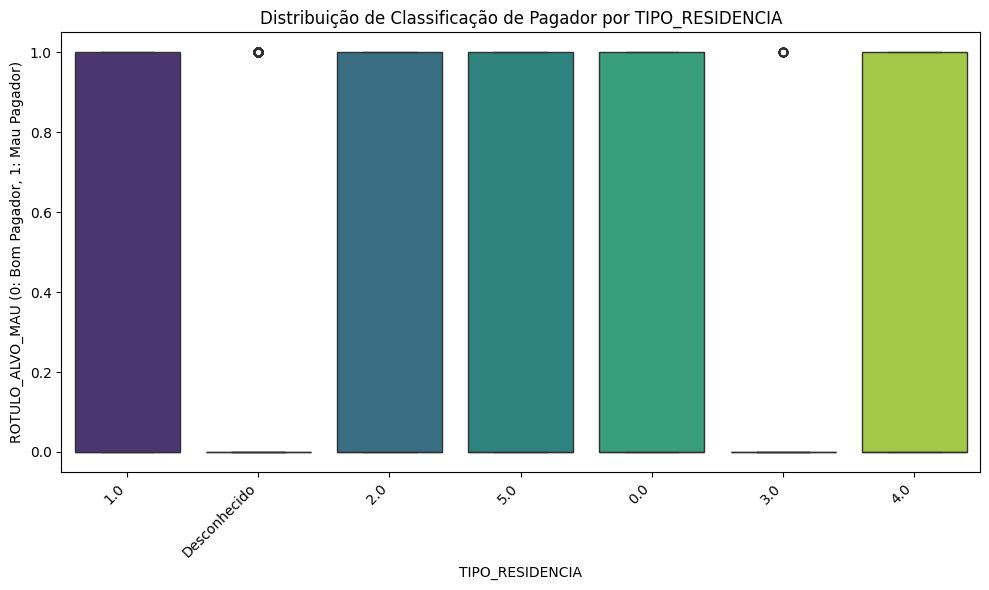

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_RESIDENCIA', y='ROTULO_ALVO_MAU', data=df, palette='viridis', hue='TIPO_RESIDENCIA', legend=False)
plt.title('Distribuição de Classificação de Pagador por TIPO_RESIDENCIA')
plt.xlabel('TIPO_RESIDENCIA')
plt.ylabel('ROTULO_ALVO_MAU (0: Bom Pagador, 1: Mau Pagador)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6.2. Barplot (Ideal)

O dicionario de dados, assim como o estado civil, não tem legendas muito claras sobre essa coluna, porém ele menciona exemplos como: **própria, hipotecada, alugada, dos pais, familiar, etc.** apesar de que em primeiro momento pareçam boas para inputar significado, não temos rotulos suficientes para todos os números.

Mesmo sem o rótulo explícito, conseguimos analisar o risco relativo entre os grupos.

Observamos que alguns tipos de residência apresentam proporções mais altas, por exemplo, os grupos **2, 4 e 5** ficam próximos de **29% a 30%** de inadimplência.

Já o código **3**, por outro lado, apresenta o menor índice, próximo de **20%**.

Isso indica que o tipo de **moradia tem, sim, relação com o comportamento de pagamento**, mesmo que não saibamos exatamente o que cada código significa.
Ou seja, o padrão existe, mas a ausência de documentação detalhada limita a interpretação específica de cada categoria.


> Mas mesmo sem ela, o interesse aqui é identificar variabilidade de risco, e isso o gráfico mostra claramente.




/tmp/ipython-input-1875108139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


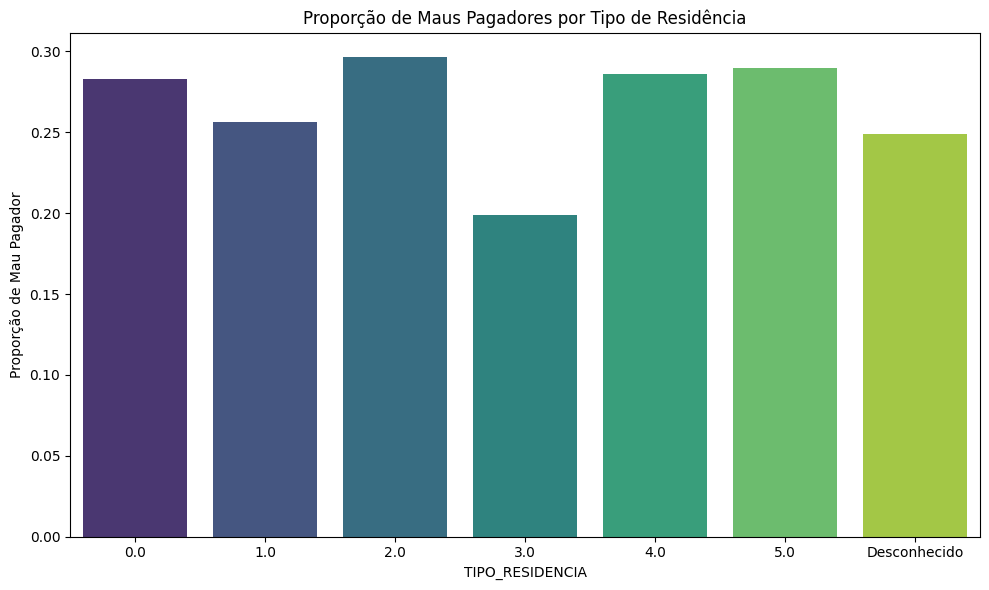

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=analyse_tipo_residencia.index,
    y=analyse_tipo_residencia['PROPORCAO_MAU_PAGADOR'],
    palette='viridis'
)

plt.title('Proporção de Maus Pagadores por Tipo de Residência')
plt.xlabel('TIPO_RESIDENCIA')
plt.ylabel('Proporção de Mau Pagador')
plt.tight_layout()
plt.show()

# 7. Renda Pessoal Mensal e Outras rendas vs. Classificação

Relação de '**RENDA_PESSOAL_MENSAL**' e '**OUTRAS_RENDAS**' com a classificação de pagador ('ROTULO_ALVO_MAU').

## 7.1. Renda pessoal Mensal

Para essa visualização, escolhemos um boxplot para represantar esses dados, e nessa fase, enontramos muitos outliers, fazendo nosso grafico ficar muito disperso e focados neles, em vez da mediana dos valores:

<br/>

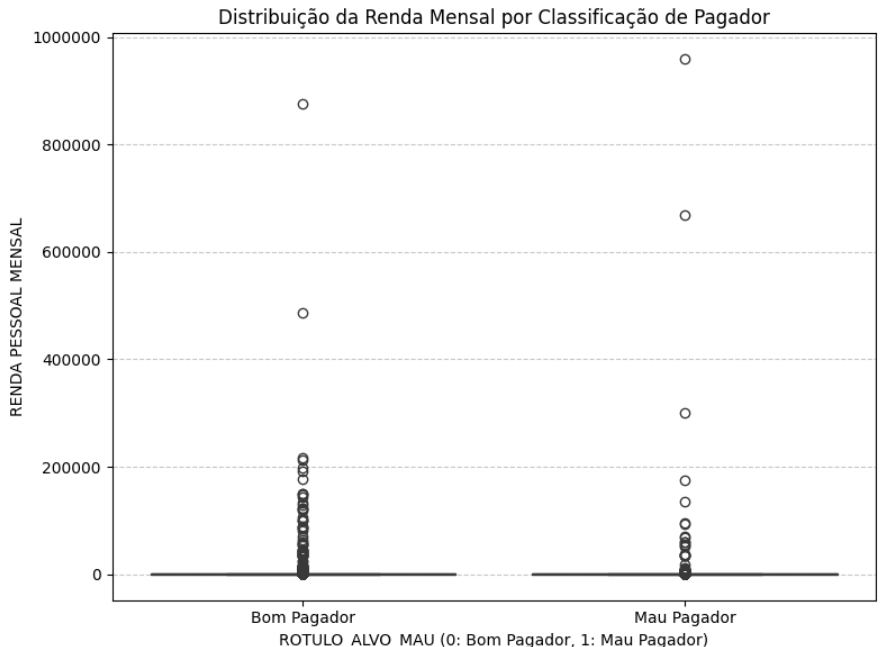

<br/>

Por isso, decidimos limitar o eixo Y até um valor que inclua a grande maioria dos seus dados (por exemplo, até o 95º ou 99º percentil da renda), ignorando os outliers para a visualização, mas mantendo a análise estatística (mediana) correta.

### **Conclusão**:

Por fim, concluimos que o dataset é dominado por clientes de baixa/média renda, e a renda muito alta (os outliers) não tem um impacto visual na distribuição central, mas é um fator importante na variação total da base.

O 95º Percentil da Renda é: R$ 1,802.05
O gráfico será ajustado para focar nas rendas até este valor.


/tmp/ipython-input-2033583708.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


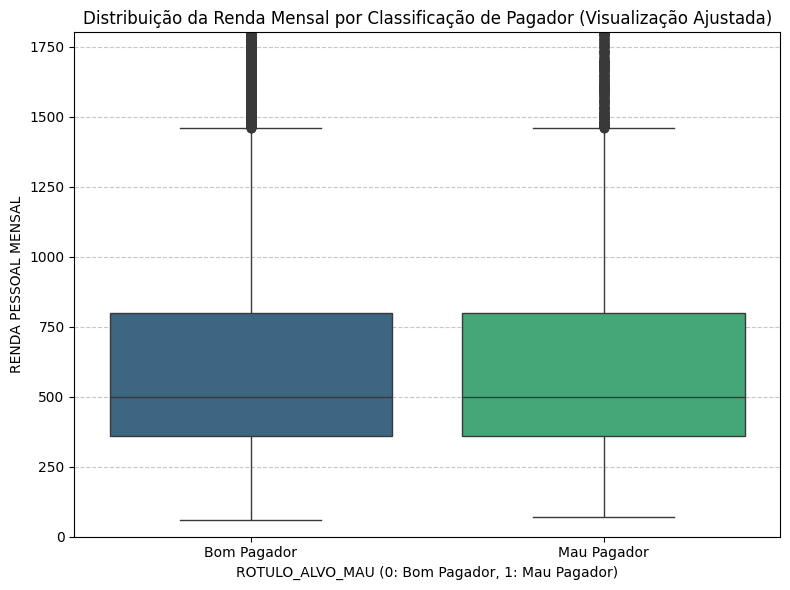

In [28]:
# 1. Calcula o valor do 95º percentil da Renda Pessoal Mensal
limite_superior = df['RENDA_PESSOAL_MENSAL'].quantile(0.95)

print(f"O 95º Percentil da Renda é: R$ {limite_superior:,.2f}")
print("O gráfico será ajustado para focar nas rendas até este valor.")

# 2. Gera o Box Plot com o limite de visualização
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='ROTULO_ALVO_MAU',
    y='RENDA_PESSOAL_MENSAL',
    data=df,
    palette='viridis'
)

# ATENÇÃO: Define o limite superior do eixo Y
plt.ylim(0, limite_superior)

# Configurando rótulos e título
plt.title('Distribuição da Renda Mensal por Classificação de Pagador (Visualização Ajustada)')
plt.xlabel('ROTULO_ALVO_MAU (0: Bom Pagador, 1: Mau Pagador)')
plt.ylabel('RENDA PESSOAL MENSAL')
plt.xticks(ticks=[0, 1], labels=['Bom Pagador', 'Mau Pagador'])
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7.2. Outras rendas

O boxplot não consegue gerar um grafico da representção de outras rendas, já que ao que parece a mediana é 0. A solução que encontramos é tratá-la como uma variável categórica/binária (Sim/Não). O insight mais relevante aqui é:

O risco de inadimplência (*quando uma pessoa ou empresa deixa de cumprir com suas obrigações financeiras*) muda se o cliente tem ou não outras fontes de renda (qualquer valor > 0)?

Por isso criamos uma nova Flag Binaria `FLAG_OUTRAS_RENDAS` (1 se for maior que zero, 0 se for zero)

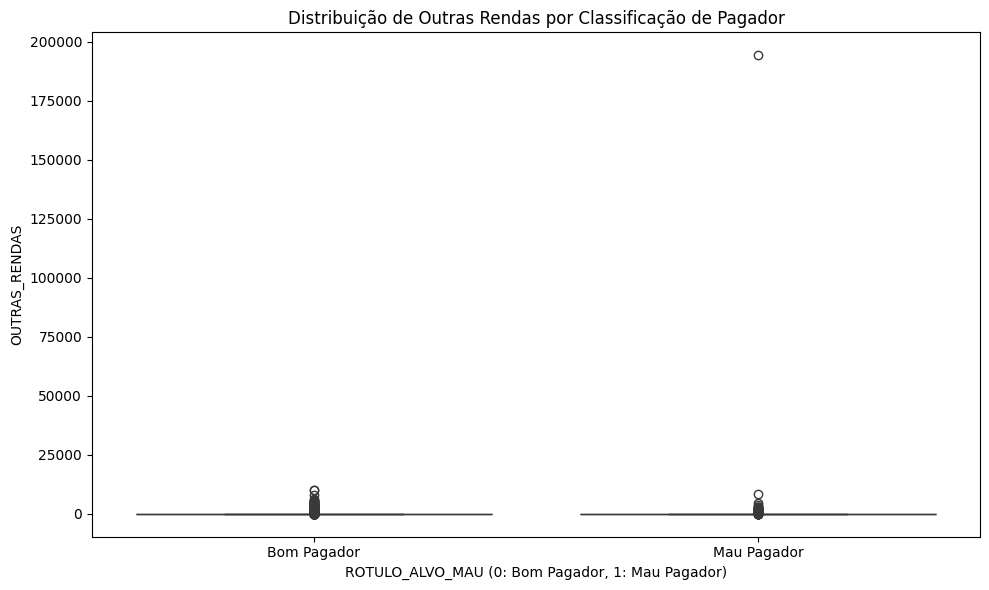

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ROTULO_ALVO_MAU', y='OUTRAS_RENDAS', data=df, palette='viridis', hue='ROTULO_ALVO_MAU', legend=False)
plt.title('Distribuição de Outras Rendas por Classificação de Pagador')
plt.xlabel('ROTULO_ALVO_MAU (0: Bom Pagador, 1: Mau Pagador)')
plt.ylabel('OUTRAS_RENDAS')
plt.xticks(ticks=[0, 1], labels=['Bom Pagador', 'Mau Pagador'])
plt.tight_layout()
plt.show()

Analisando FLAG_OUTRAS_RENDAS vs. ROTULO_ALVO_MAU:


ROTULO_ALVO_MAU,0,1,PROPORCAO_MAU_PAGADOR
FLAG_OUTRAS_RENDAS,,,
0,34845,12382,0.262181
1,2114,659,0.237649


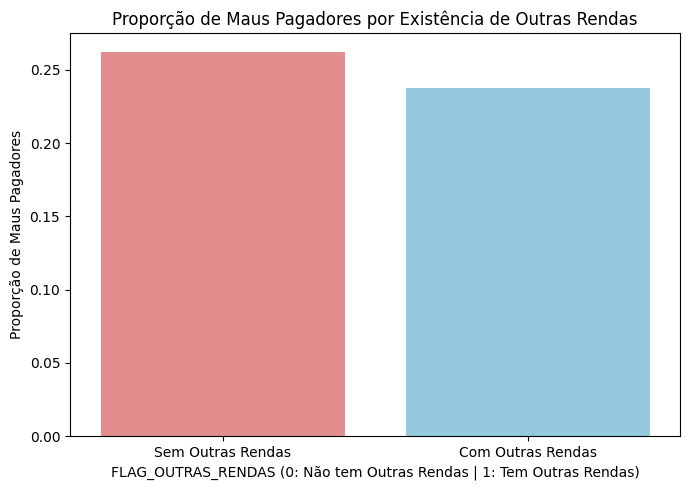

In [30]:
# Se OUTRAS_RENDAS > 0, a flag é 1 (Tem Outras Rendas), senão é 0 (Não Tem)
df['FLAG_OUTRAS_RENDAS'] = np.where(df['OUTRAS_RENDAS'] > 0, 1, 0)

print('Analisando FLAG_OUTRAS_RENDAS vs. ROTULO_ALVO_MAU:')
analyse_flag_outras_rendas = df.groupby(['FLAG_OUTRAS_RENDAS', 'ROTULO_ALVO_MAU']).size().unstack(fill_value=0)
analyse_flag_outras_rendas['PROPORCAO_MAU_PAGADOR'] = analyse_flag_outras_rendas[1] / (analyse_flag_outras_rendas[0] + analyse_flag_outras_rendas[1])
display(analyse_flag_outras_rendas)

plt.figure(figsize=(7, 5))
sns.barplot(
    x=analyse_flag_outras_rendas.index,
    y=analyse_flag_outras_rendas['PROPORCAO_MAU_PAGADOR'],
    palette=['lightcoral', 'skyblue'],
    hue=analyse_flag_outras_rendas.index,
    legend=False
)

plt.title('Proporção de Maus Pagadores por Existência de Outras Rendas')
plt.xlabel('FLAG_OUTRAS_RENDAS (0: Não tem Outras Rendas | 1: Tem Outras Rendas)')
plt.ylabel('Proporção de Maus Pagadores')
plt.xticks(ticks=[0, 1], labels=['Sem Outras Rendas', 'Com Outras Rendas'])
plt.tight_layout()
plt.show()

### **Conclusão**:

Agora com esse grafico de barras, podemos ver que a barra "Sem Outras Rendas"  (0) tem uma taxa de inadimplência (risco) mais alta. Enquanto "Com Outras Rendas" (1) tem uma taxa de inadimplência (risco) mais baixa.

Como o grupo "Com Outras Rendas" tem uma taxa de risco (22-23%) inferior ao grupo "Sem Outras Rendas" (26-27%), concluímos que a existência de uma segunda fonte de renda funciona como um fator **protetor**.

In [31]:
df['RENDA_PESSOAL_MENSAL'].value_counts()

,count
RENDA_PESSOAL_MENSAL,
350.00,6898
500.00,1453
400.00,1402
380.00,1362
600.00,1198
...,...
842.44,1
569.70,1
612.52,1


# 8. Idade vs. Classificação do pagador

Vamos verificar se 'IDADE' interfere na classificação do pagador ('ROTULO_ALVO_MAU'), utilizando um boxplot ou histogramas para comparar a distribuição de idade entre bons e maus pagadores.


**Conclusão do gráfico a baixo**:

A diferença entre as distribuições não é drástica, mas é visível:

**Risco por Idade**: Pessoas com idades mais jovens (mediana mais baixa) têm uma probabilidade ligeiramente maior de serem Maus Pagadores (Rótulo 1).

**Estabilidade por Idade**: Pessoas com idades mais maduras (mediana mais alta) tendem a estar mais concentradas no grupo de Bons Pagadores (Rótulo 0).

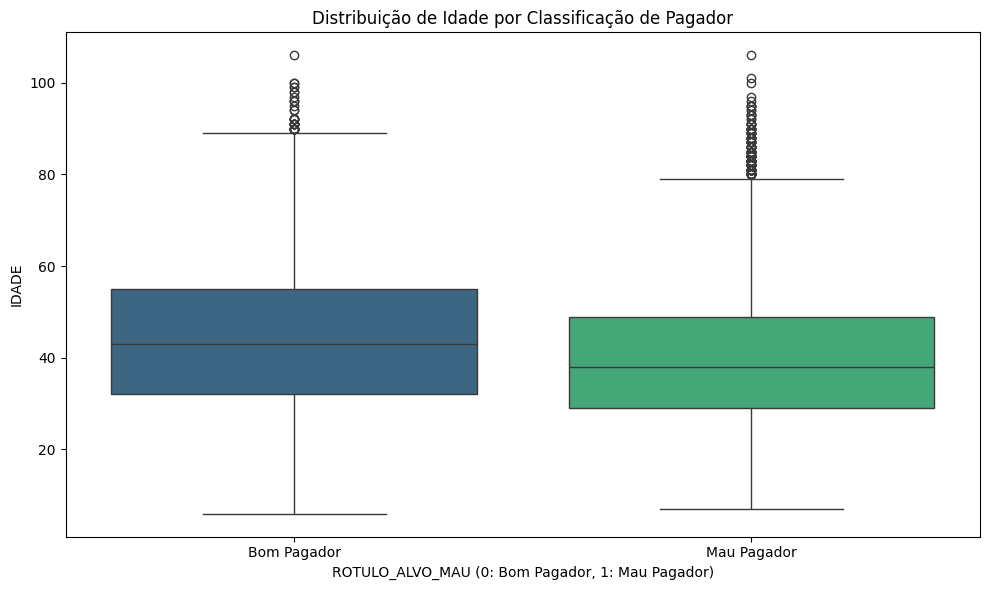

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ROTULO_ALVO_MAU', y='IDADE', data=df, palette='viridis', hue='ROTULO_ALVO_MAU', legend=False)
plt.title('Distribuição de Idade por Classificação de Pagador')
plt.xlabel('ROTULO_ALVO_MAU (0: Bom Pagador, 1: Mau Pagador)')
plt.ylabel('IDADE')
plt.xticks(ticks=[0, 1], labels=['Bom Pagador', 'Mau Pagador'])
plt.tight_layout()
plt.show()

# Conclusão Geral da Análise

A análise permitiu compreender com clareza o perfil dos clientes e os fatores associados ao risco de inadimplência. O processo começou pela importação do dataset bruto, seguido de padronização estrutural (nomes de colunas, tipos de dados, categorização, tratamento de nulos...) e finalizou com uma investigação detalhada da variável-alvo e das principais características demográficas e financeiras.

De forma geral, o dataset mostrou-se bem distribuído, mas com limitações importantes, como ausência de algumas variáveis essenciais (ex.: nível educacional) e categorias pouco documentadas. Ainda assim, foi possível extrair padrões consistentes.


---


</BR>

## Principais Insights Identificados

1. **Distribuição do Risco de Inadimplência**: A proporção de bons e maus pagadores é relativamente equilibrada, sem desequilíbrios extremos. Isso torna o dataset adequado para modelagem, sem necessidade imediata de técnicas de reamostragem.
<BR/>

2. **Variáveis Demográficas**

    2.1. **Sexo**: Mulheres e homens apresentam taxas semelhantes, mas a inadimplência é levemente maior entre homens (~27% vs. ~25%). O impacto existe, mas é moderado.

    2.2. Estado Civil: Solteiros se destacam com maior risco. Casados, divorciados e viúvos apresentam menor inadimplência, indicando padrões de estabilidade. Categorias com poucos registros foram analisadas com cautela.

    2.3. Número de Dependentes: Grupos com 0 a 2 dependentes têm comportamento uniforme. A partir de 3 dependentes, há aumento gradual do risco — coerente com maior carga financeira. Valores muito altos são estatisticamente instáveis.
<BR/>

3. **Escolaridade**: A variável original não possui dados válidos, inviabilizando análise. Usando nível educacional do cônjuge como proxy:

    - Valores mais baixos tendem a apresentar mais risco.
    - Categorias com poucos registros distorcem proporções.
    - O comportamento sugere que educação tem influência, mas o efeito é limitado pela baixa qualidade do atributo.

<BR/>

4. **Localização (Estado Residencial)**: A inadimplência varia entre 18% e 32%, indicando influência moderada da geografia. Estados como SC, RS e RO mostram menor risco. SE, DF, AL e AM mostram maiores taxas. Estados com poucos registros foram interpretados com cuidado.

<BR/>

5. **Renda e Outliers**: A maior parte dos clientes concentra-se em renda baixa/média. Muitos outliers distorciam os gráficos; limitar o eixo ajudou a visualizar a mediana corretamente. A presença de outliers mostra alta dispersão de renda, mas não afeta a tendência central.

<BR/>

6. **Tipo de Residência**: O boxplot se mostrou inadequado por causa da variável binária da inadimplência. Após trocar para barplot, ficou claro que:

    - Alguns grupos (códigos 2, 4 e 5) têm maior risco (~29–30%).
    - O grupo 3 apresenta o menor risco (~20%).

    Mesmo sem documentação detalhada dos códigos, a variável mostra forte relação com inadimplência.

<BR/>

7. **Outras Fontes de Renda**: A criação da variável binária FLAG_OUTRAS_RENDAS permitiu avaliar a relação com o comportamento financeiro:

    - Ter outras fontes de renda reduz levemente o risco.

    - A diferença não é extrema, mas é visível.

8. **Idade**:
    - Clientes mais jovens tendem a ter maior inadimplência.
    - Clientes mais velhos apresentam comportamento mais estável.
    - A idade se mostrou um preditor relevante e coerente.

<BR/>

## Síntese Final

A inadimplência é um fenômeno multifatorial: nenhum atributo isolado explica perfeitamente o risco, mas diversos fatores apresentam influência moderada e coerente — como estado civil, tipo de residência, dependentes, idade e nível educacional (via proxy). Algumas variáveis possuem limitações claras, seja por falta de documentação ou ausência de dados, mas ainda assim permitem observar tendências estruturais.

De forma geral, os padrões indicam que características associadas à estabilidade financeira e familiar tendem a reduzir o risco, enquanto fatores relacionados a maior vulnerabilidade econômica (dependentes, baixa escolaridade, renda restrita, alguns tipos de residência) ampliam a probabilidade de inadimplência.

A análise consolidou uma visão sólida do comportamento dos clientes e estabelece uma base confiável para etapas posteriores, como modelagem preditiva ou definição de políticas de crédito.

# MACHINE LEARNING - CLASSIFICAÇÃO DE RISCO DE CRÉDITO

## Objetivo
Construir modelos preditivos para classificar clientes como **bons** ou **maus pagadores** com base em características demográficas, financeiras e comportamentais.

## Abordagem
- **Pipeline automatizado**: Pré-processamento + Modelo
- **Modelos testados**: Regressão Logística (baseline) e Random Forest (ensemble)
- **Métricas de avaliação**: Accuracy, ROC AUC, Precision, Recall, Matriz de Confusão

---

In [33]:
# Normalizar flags problemáticas de forma agressiva

def normaliza_flag(col):
    """Converte qualquer coisa parecida com 'y' em 1 e o resto em 0."""
    col = col.astype(str).str.strip().str.lower()
    return col.map({'y': 1, 'n': 0, '1': 1, '0': 0}).fillna(0).astype(int)

flags_texto = [
    "FLAG_TELEFONE_RESIDENCIAL",
    "FLAG_TELEFONE_MOVEL",
    "FLAG_OUTROS_CARTOES",
    "FLAG_REGISTRO_ACSP",
]

for col in flags_texto:
    if col in df.columns:
        df[col] = normaliza_flag(df[col])

print(df[flags_texto].dtypes)

FLAG_TELEFONE_RESIDENCIAL    int64
FLAG_TELEFONE_MOVEL          int64
FLAG_OUTROS_CARTOES          int64
FLAG_REGISTRO_ACSP           int64
dtype: object


### Normalização Completa de Todas as Flags

Aplicando a normalização para **todas** as colunas de flags binárias do dataset para garantir consistência.

In [34]:
todas_flags = [
    "FLAG_TELEFONE_RESIDENCIAL",
    "FLAG_TELEFONE_MOVEL",
    "FLAG_EMAIL",
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES",
    "FLAG_DOCUMENTO_RESIDENCIAL",
    "FLAG_RG",
    "FLAG_CPF",
    "FLAG_COMPROVANTE_RENDA",
    "FLAG_REGISTRO_ACSP",
    "FLAG_OUTRAS_RENDAS",
]

for col in todas_flags:
    if col in df.columns:
        df[col] = normaliza_flag(df[col])

print(df[todas_flags].dtypes)

FLAG_TELEFONE_RESIDENCIAL     int64
FLAG_TELEFONE_MOVEL           int64
FLAG_EMAIL                    int64
FLAG_VISA                     int64
FLAG_MASTERCARD               int64
FLAG_DINERS                   int64
FLAG_AMERICAN_EXPRESS         int64
FLAG_OUTROS_CARTOES           int64
FLAG_DOCUMENTO_RESIDENCIAL    int64
FLAG_RG                       int64
FLAG_CPF                      int64
FLAG_COMPROVANTE_RENDA        int64
FLAG_REGISTRO_ACSP            int64
FLAG_OUTRAS_RENDAS            int64
dtype: object


## 1. Importação de Bibliotecas

Carregando as ferramentas necessárias do **scikit-learn** para:
- Divisão de dados (train/test split)
- Pré-processamento (padronização e codificação)
- Construção de pipelines
- Treinamento de modelos
- Avaliação de desempenho

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## 2. Definição de Features e Target

### Estratégia de Seleção de Features

Separamos as variáveis em **3 categorias** para aplicar transformações adequadas:

1. **Numéricas**: Valores contínuos ou discretos → Serão **padronizados** (StandardScaler)
2. **Categóricas**: Variáveis qualitativas → Serão **codificadas** (One-Hot Encoding)
3. **Binárias**: Flags 0/1 → Serão **padronizadas** junto com as numéricas

### Variável Alvo
- `ROTULO_ALVO_MAU`: 0 = Bom pagador | 1 = Mau pagador

In [36]:
target = "ROTULO_ALVO_MAU"
y = df[target].astype(int)

# Numéricas
num_features = [
    "QUANT_CARTOES_ADICIONAIS",
    "QUANT_DEPENDENTES",
    "MESES_RESIDENCIA",
    "RENDA_PESSOAL_MENSAL",
    "OUTRAS_RENDAS",
    "QUANT_CONTAS_BANCARIAS",
    "QUANT_CONTAS_BANCARIAS_ESPECIAIS",
    "VALOR_PATRIMONIO_PESSOAL",
    "MESES_NO_TRABALHO",
    "QUANT_CARROS",
    "IDADE"
]

# Categóricas
cat_features = [
    "SEXO_PADRONIZADO",
    "ESTADO_CIVIL",
    "TIPO_RESIDENCIA",
    "ESTADO_RESIDENCIAL",
    "PRODUTO"
]

# Binárias (já convertidas para 0/1)
binary_features = [
    "TIPO_ENDERECO_POSTAL",
    "FLAG_TELEFONE_RESIDENCIAL",
    "FLAG_TELEFONE_MOVEL",
    "FLAG_EMAIL",
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES",
    "FLAG_DOCUMENTO_RESIDENCIAL",
    "FLAG_RG",
    "FLAG_CPF",
    "FLAG_COMPROVANTE_RENDA",
    "FLAG_REGISTRO_ACSP",
    "FLAG_OUTRAS_RENDAS"
]

# Criar X
X = df[num_features + cat_features + binary_features].copy()

# Verificar se há valores não numéricos
print("Tipos de dados em X:")
print(X.dtypes)
print("\nValores únicos em colunas categóricas:")
for col in cat_features:
    print(f"{col}: {X[col].unique()[:5]}")

Tipos de dados em X:
QUANT_CARTOES_ADICIONAIS              int64
QUANT_DEPENDENTES                     int64
MESES_RESIDENCIA                    float64
RENDA_PESSOAL_MENSAL                float64
OUTRAS_RENDAS                       float64
QUANT_CONTAS_BANCARIAS                int64
QUANT_CONTAS_BANCARIAS_ESPECIAIS      int64
VALOR_PATRIMONIO_PESSOAL            float64
MESES_NO_TRABALHO                     int64
QUANT_CARROS                          int64
IDADE                                 int64
SEXO_PADRONIZADO                     object
ESTADO_CIVIL                         object
TIPO_RESIDENCIA                      object
ESTADO_RESIDENCIAL                   object
PRODUTO                              object
TIPO_ENDERECO_POSTAL                  int64
FLAG_TELEFONE_RESIDENCIAL             int64
FLAG_TELEFONE_MOVEL                   int64
FLAG_EMAIL                            int64
FLAG_VISA                             int64
FLAG_MASTERCARD                       int64
FLAG_DINERS

## 3. Divisão Treino-Teste

Separamos os dados em:
- **70% para treino**: Usado para ajustar os modelos
- **30% para teste**: Usado para avaliar o desempenho em dados não vistos

**Importante**: Usamos `stratify=y` para manter a **proporção de classes** (bons vs. maus pagadores) em ambos os conjuntos.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"\n✅ Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Distribuição do target no treino:\n{y_train.value_counts(normalize=True)}")


✅ Train: (35000, 31), Test: (15000, 31)
Distribuição do target no treino:
ROTULO_ALVO_MAU
0    0.739171
1    0.260829
Name: proportion, dtype: float64


## 4. Construção do Pipeline de Pré-processamento

### Transformações Aplicadas

| Tipo de Feature | Transformação | Objetivo |
|-----------------|---------------|----------|
| **Numéricas + Binárias** | `StandardScaler` | Padronizar para média=0 e desvio=1 |
| **Categóricas** | `OneHotEncoder` | Criar colunas binárias para cada categoria |

O `ColumnTransformer` permite aplicar transformações diferentes para cada tipo de coluna automaticamente.

In [38]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features + binary_features),
        ("cat", categorical_transformer, cat_features),
    ]
)

## 5. Modelo 1: Regressão Logística (Baseline)

### Características
- **Tipo**: Modelo linear simples
- **Uso**: Baseline para comparação
- **Vantagens**: Rápido, interpretável, bom para relações lineares
- **Configuração**: `class_weight="balanced"` para compensar desbalanceamento de classes

### Treinamento e Avaliação

In [39]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", log_reg)
])

print("\n🔄 Treinando Regressão Logística...")
log_reg_pipeline.fit(X_train, y_train)

# Predições
y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Métricas
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"\n Accuracy (Regressão Logística): {acc:.4f}")
print(f" ROC AUC (Regressão Logística): {roc:.4f}")
print("\n Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["Bom pagador", "Mau pagador"]))


🔄 Treinando Regressão Logística...

 Accuracy (Regressão Logística): 0.5701
 ROC AUC (Regressão Logística): 0.6093

 Relatório de Classificação:
              precision    recall  f1-score   support

 Bom pagador       0.80      0.56      0.66     11088
 Mau pagador       0.33      0.60      0.42      3912

    accuracy                           0.57     15000
   macro avg       0.56      0.58      0.54     15000
weighted avg       0.68      0.57      0.60     15000



### Visualização 1: Matriz de Confusão - Regressão Logística

A matriz de confusão mostra:
- **Verdadeiros Positivos (VP)**: Maus pagadores corretamente identificados
- **Verdadeiros Negativos (VN)**: Bons pagadores corretamente identificados
- **Falsos Positivos (FP)**: Bons pagadores classificados como maus (perda de cliente)
- **Falsos Negativos (FN)**: Maus pagadores classificados como bons (perda financeira)

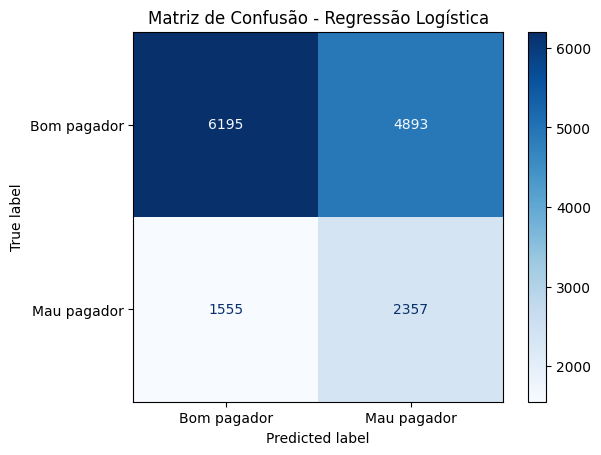

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Bom pagador", "Mau pagador"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

### Visualização 2: Curva ROC - Regressão Logística

A **Curva ROC** (Receiver Operating Characteristic) mostra o trade-off entre:
- **Taxa de Verdadeiros Positivos (Sensibilidade)**: Capacidade de detectar maus pagadores
- **Taxa de Falsos Positivos**: Proporção de bons pagadores classificados incorretamente

**ROC AUC** (Área sob a curva):
- 0.5 = Modelo aleatório (linha diagonal)
- 1.0 = Modelo perfeito
- Valores > 0.7 são considerados bons

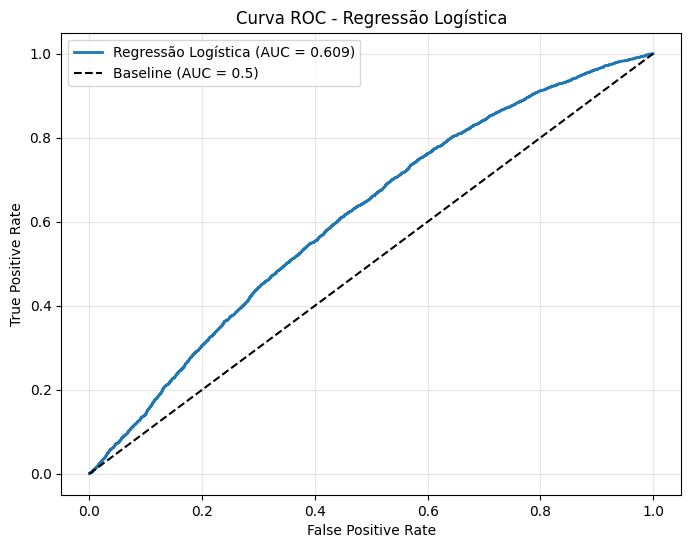

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Regressão Logística (AUC = {roc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Baseline (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regressão Logística")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Modelo 2: Random Forest (Ensemble)

### Características
- **Tipo**: Ensemble de múltiplas árvores de decisão
- **Vantagens**: Captura relações não-lineares, robusto a outliers, menos propenso a overfitting
- **Configuração**:
  - `n_estimators=100`: 100 árvores na floresta
  - `max_depth=10`: Profundidade máxima para evitar overfitting
  - `class_weight="balanced"`: Compensa desbalanceamento

### Treinamento e Avaliação

In [42]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf)
])

print("\n🔄 Treinando Random Forest...")
rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"\n Accuracy (Random Forest): {acc_rf:.4f}")
print(f" ROC AUC (Random Forest): {roc_rf:.4f}")
print("\n Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["Bom pagador", "Mau pagador"]))


🔄 Treinando Random Forest...

 Accuracy (Random Forest): 0.5694
 ROC AUC (Random Forest): 0.6132

 Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

 Bom pagador       0.80      0.56      0.66     11088
 Mau pagador       0.32      0.60      0.42      3912

    accuracy                           0.57     15000
   macro avg       0.56      0.58      0.54     15000
weighted avg       0.68      0.57      0.60     15000



###  Visualização 3: Matriz de Confusão - Random Forest

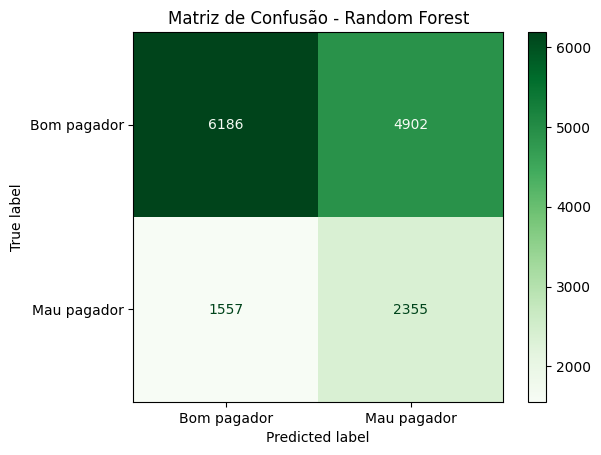

In [43]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=["Bom pagador", "Mau pagador"])
disp_rf.plot(cmap="Greens")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

##  Comparação Final: Regressão Logística vs. Random Forest

Esta visualização permite comparar diretamente a **capacidade de discriminação** dos dois modelos através das curvas ROC sobrepostas.

### Critérios de Escolha do Melhor Modelo
1. **ROC AUC**: Quanto maior, melhor a separação entre classes
2. **Recall (Mau pagador)**: Importante para minimizar perdas financeiras
3. **Precision (Mau pagador)**: Importante para não rejeitar bons clientes
4. **Trade-off**: Balancear falsos positivos vs. falsos negativos conforme regra de negócio

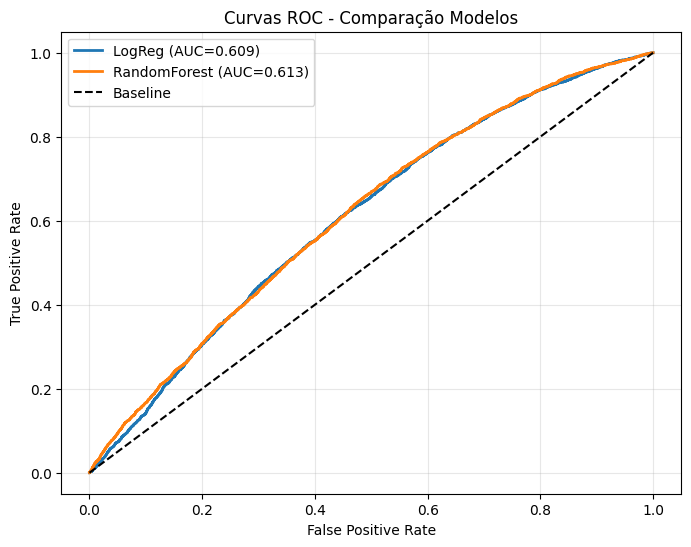


🎉 Treinamento concluído!


In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LogReg (AUC={roc:.3f})", linewidth=2)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={roc_rf:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Comparação Modelos")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n🎉 Treinamento concluído!")

## Conclusões e Próximos Passos

### Interpretação dos Resultados
- Compare os valores de **ROC AUC**, **Recall** e **Precision** de ambos os modelos
- Analise as matrizes de confusão para entender os tipos de erros cometidos
- Considere o **custo de negócio** de cada tipo de erro (FP vs. FN)